In [1]:
!pip install kaggle


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
#api to fetch datasets from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 98% 160M/163M [00:04<00:00, 44.2MB/s]
100% 163M/163M [00:04<00:00, 34.5MB/s]


In [4]:
from zipfile import ZipFile
dataset = "/content/face-mask-dataset.zip"

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("Done extarcting dataset")

Done extarcting dataset


In [5]:
#this command lists all directories uploaded
!ls

data  face-mask-dataset.zip  sample_data


finished importing the dataset
and now start building model
1. import the dependencies
2. apply label encoding

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
files_with_mask = os.listdir('/content/data/with_mask')
print(files_with_mask[:5])
files_without_mask = os.listdir('/content/data/without_mask')
print(files_without_mask[:5])

['with_mask_3274.jpg', 'with_mask_2139.jpg', 'with_mask_330.jpg', 'with_mask_2056.jpg', 'with_mask_1326.jpg']
['without_mask_2356.jpg', 'without_mask_3650.jpg', 'without_mask_270.jpg', 'without_mask_1085.jpg', 'without_mask_681.jpg']


In [8]:
print('Number of files with mask:', len(files_with_mask))
print('Number of files without mask:', len(files_without_mask))

Number of files with mask: 3725
Number of files without mask: 3828


In [9]:
#create labels for performing label encoding
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [16]:
print(with_mask_labels[:5])
print(without_mask_labels[:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [10]:
#combining these datasets
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[:5])

7553
[1, 1, 1, 1, 1]


displaying the images

<function matplotlib.pyplot.show(close=None, block=None)>

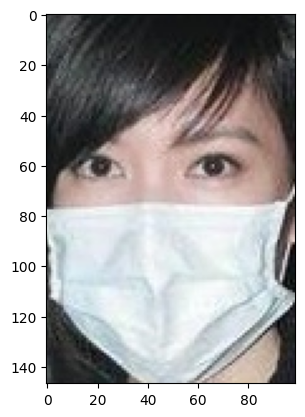

In [14]:
img=mpimg.imread('/content/data/with_mask/with_mask_5.jpg')
imgplot = plt.imshow(img)
plt.show

we need to apply image processing as all images have different dimensions.
step 1: resize the images.
step 2: convert the image to numpy arrays

In [15]:
#converting images to numpy arrays


files_with_mask_path =('/content/data/with_mask/')
data =[]
for file_img in files_with_mask:
  image = Image.open(files_with_mask_path + file_img)
  image = image.resize((128,128))
  image = image.convert('RGB')  #color all img if any black and white img comes
  image = np.array(image)
  data.append(image)


files_without_mask_path =('/content/data/without_mask/')

for file_img in files_without_mask:
  image = Image.open(files_without_mask_path + file_img)
  image = image.resize((128,128))
  image = image.convert('RGB')  #color all img if any black and white img comes
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [16]:
type(data)

list

In [17]:
len(data)

7553

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[254, 254, 254],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [240, 239, 235],
        [240, 239, 235],
        [240, 239, 235]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [238, 237, 233],
        [239, 238, 234],
        [239, 238, 234]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [240, 239, 235],
        [241, 241, 237],
        [241, 240, 236]]], dtype=uint8)
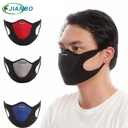

In [18]:
data[0]   #this shows that img are converted to arrays and 3 matrices are seen which are the red,green and blue color for them.

In [19]:
#converting img list and label list to numpy arrays
X = np.array(data)
Y = np.array(labels)

Train test split data

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

In [23]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(7553, 128, 128, 3)
(6042, 128, 128, 3)
(1511, 128, 128, 3)


In [24]:
#scaling the data. this is done as above color ranges from 0 to 255 and now we are chsnging the range to 0 and 1.

X_train_scaled = X_train/255
X_test_scaled = X_test/255



building cnn


In [25]:
import tensorflow as tf
from tensorflow import keras

In [26]:
num_of_classes = 2

model = keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))

In [27]:
#above was the architecture for neural network and now we r compiling
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [28]:
#training the network
history = model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=10)

Epoch 1/10
170/170 [==============================] - 10s 25ms/step - loss: 0.4619 - accuracy: 0.8095 - val_loss: 0.3226 - val_accuracy: 0.8744
Epoch 2/10
170/170 [==============================] - 3s 18ms/step - loss: 0.2751 - accuracy: 0.8904 - val_loss: 0.2682 - val_accuracy: 0.8843
Epoch 3/10
170/170 [==============================] - 3s 17ms/step - loss: 0.2376 - accuracy: 0.9073 - val_loss: 0.2744 - val_accuracy: 0.8942
Epoch 4/10
170/170 [==============================] - 3s 17ms/step - loss: 0.1936 - accuracy: 0.9226 - val_loss: 0.3208 - val_accuracy: 0.8926
Epoch 5/10
170/170 [==============================] - 3s 19ms/step - loss: 0.1614 - accuracy: 0.9331 - val_loss: 0.3005 - val_accuracy: 0.9091
Epoch 6/10
170/170 [==============================] - 3s 19ms/step - loss: 0.1483 - accuracy: 0.9445 - val_loss: 0.3130 - val_accuracy: 0.9091
Epoch 7/10
170/170 [==============================] - 3s 17ms/step - loss: 0.1251 - accuracy: 0.9527 - val_loss: 0.2333 - val_accuracy: 0.922

In [29]:
#model evaluation

loss,accuracy = model.evaluate(X_test_scaled,Y_test)
print(accuracy)

48/48 [==============================] - 1s 13ms/step - loss: 0.2803 - accuracy: 0.9272
0.9272005558013916


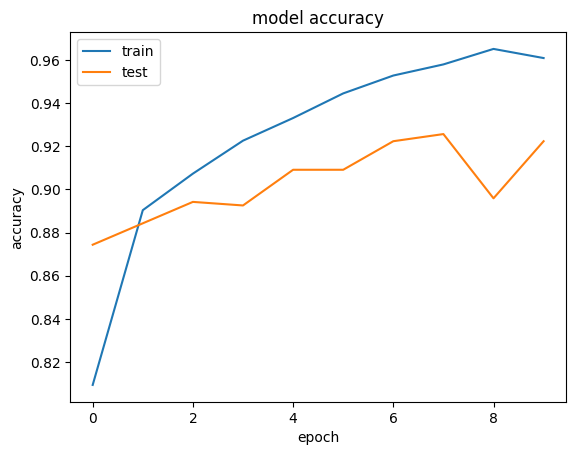

In [30]:
h = history
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()

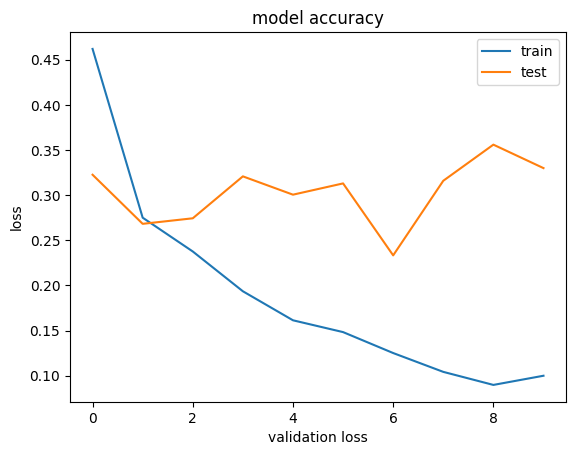

In [31]:
h = history
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('validation loss')
plt.legend(['train','test'])
plt.show()

enter img path/content/data/without_mask/without_mask_1.jpg


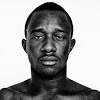

1/1 [==============================] - 0s 17ms/step
[[0.42249593 0.5819123 ]]
[1]
person is not wearing mask


In [43]:
#predictive system

input_img_path = input('enter img path')
input_img = cv2.imread(input_img_path)
cv2_imshow(input_img)

input_img_resized = cv2.resize(input_img,(128,128))

input_img_scaled = input_img_resized/255

input_img_reshaped = np.reshape(input_img_scaled,[1,128,128,3])

input_prediction = model.predict(input_img_reshaped)
print(input_prediction)

input_pred_label = [np.argmax(input_prediction)]
print(input_pred_label)


if input_pred_label[0] ==0:
  print('person wears a mask')
else:
  print('person is not wearing mask')

In [44]:
import pickle

# Save the model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Load the model
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
